# Handwritten digit classification using Neural network

In this notebook, a simple neural network containing an input layer and output layer is used to classify the handwritten digits.
And then an hidden layer is added into the neural network to improve the performance.
Different combinations of activation functions are tried to analyse the variation in performance of the neural network.

In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [30]:
data=loadmat('ex4data1')

In [31]:
type(data)

dict

In [32]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [33]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [34]:
len(data['X'])

5000

In [35]:
type(data['X'])

numpy.ndarray

In [36]:
len(data['y'])

5000

In [37]:
type(data['y'])

numpy.ndarray

In [38]:
data['X'].shape

(5000, 400)

In [39]:
data['y'].shape

(5000, 1)

In [40]:
d=data['X']
out=data['y']

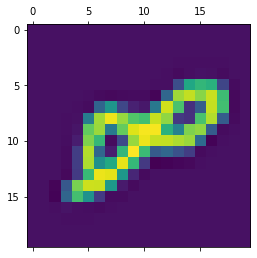

In [41]:
plt.matshow(d[4000].reshape(20,20))

In [42]:
out[4000]

array([8], dtype=uint8)

In [43]:
data1=pd.DataFrame(d)
data1

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
out1=pd.DataFrame(out)
out1

,0
0,10
1,10
2,10
3,10
4,10
...,...
4995,9
4996,9
4997,9
4998,9


In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data1=sc.fit_transform(data1)


In [46]:
data1

array([[ 0.        ,  0.        , -0.01414355, ..., -0.01332023,
         0.01333207,  0.        ],
       [ 0.        ,  0.        , -0.01414355, ..., -0.01332023,
         0.01333207,  0.        ],
       [ 0.        ,  0.        , -0.01414355, ..., -0.01332023,
         0.01333207,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.01414355, ..., -0.01332023,
         0.01333207,  0.        ],
       [ 0.        ,  0.        , -0.01414355, ..., -0.01332023,
         0.01333207,  0.        ],
       [ 0.        ,  0.        , -0.01414355, ..., -0.01332023,
         0.01333207,  0.        ]])

# Split the data into training and test data

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data1,out1,test_size=0.2)
Y_train.shape

(4000, 1)

# Buiding a simple neural network

In [48]:
model1 = keras.Sequential([
    keras.layers.Dense(11, input_shape=(400,),activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 726us/step - loss: 1.9041 - accuracy: 0.5403
Epoch 2/5
125/125 [==============================] - 0s 806us/step - loss: 1.5966 - accuracy: 0.6898
Epoch 3/5
125/125 [==============================] - 0s 758us/step - loss: 1.4497 - accuracy: 0.6942
Epoch 4/5
125/125 [==============================] - 0s 662us/step - loss: 1.3248 - accuracy: 0.6875
Epoch 5/5
125/125 [==============================] - 0s 678us/step - loss: 1.2070 - accuracy: 0.6867


# Using one hidden layer with 100 units

In [49]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(400,),activation='sigmoid'),
    keras.layers.Dense(11,activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 790us/step - loss: 1.5093 - accuracy: 0.7138
Epoch 2/5
125/125 [==============================] - 0s 766us/step - loss: 0.5639 - accuracy: 0.8852
Epoch 3/5
125/125 [==============================] - 0s 774us/step - loss: 0.3727 - accuracy: 0.9190
Epoch 4/5
125/125 [==============================] - 0s 782us/step - loss: 0.2912 - accuracy: 0.9330
Epoch 5/5
125/125 [==============================] - 0s 846us/step - loss: 0.2453 - accuracy: 0.9448


# Using RelU activation in hidden layer

In [50]:
model3 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(400,),activation='relu'),
    keras.layers.Dense(11,activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 830us/step - loss: 1.1545 - accuracy: 0.7268
Epoch 2/5
125/125 [==============================] - 0s 798us/step - loss: 0.2933 - accuracy: 0.9220
Epoch 3/5
125/125 [==============================] - 0s 830us/step - loss: 0.1744 - accuracy: 0.9550
Epoch 4/5
125/125 [==============================] - 0s 830us/step - loss: 0.1225 - accuracy: 0.9685
Epoch 5/5
125/125 [==============================] - 0s 782us/step - loss: 0.0882 - accuracy: 0.9783


# Using 400 units in the hidden layer, sigmoid activation

In [51]:
model4 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(400,),activation='sigmoid'),
    keras.layers.Dense(11,activation='sigmoid')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 965us/step - loss: 0.8810 - accuracy: 0.7790
Epoch 2/5
125/125 [==============================] - 0s 918us/step - loss: 0.3236 - accuracy: 0.9112
Epoch 3/5
125/125 [==============================] - 0s 933us/step - loss: 0.2482 - accuracy: 0.9305
Epoch 4/5
125/125 [==============================] - 0s 989us/step - loss: 0.2040 - accuracy: 0.9452
Epoch 5/5
125/125 [==============================] - 0s 926us/step - loss: 0.1726 - accuracy: 0.9572


# Using 400 units in the hidden layer with Relu activation

In [52]:
model5 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(400,),activation='relu'),
    keras.layers.Dense(11,activation='sigmoid')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 981us/step - loss: 0.7284 - accuracy: 0.8280
Epoch 2/5
125/125 [==============================] - 0s 941us/step - loss: 0.1722 - accuracy: 0.9520
Epoch 3/5
125/125 [==============================] - 0s 918us/step - loss: 0.0918 - accuracy: 0.9770
Epoch 4/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0521 - accuracy: 0.9898
Epoch 5/5
125/125 [==============================] - 0s 910us/step - loss: 0.0310 - accuracy: 0.9973


In [53]:
model6 = keras.Sequential([
    keras.layers.Dense(250, input_shape=(400,),activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(11,activation='sigmoid')
])

model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model6.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 1ms/step - loss: 0.7282 - accuracy: 0.7972
Epoch 2/5
125/125 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9442
Epoch 3/5
125/125 [==============================] - 0s 1ms/step - loss: 0.1026 - accuracy: 0.9693
Epoch 4/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 0.9835
Epoch 5/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0335 - accuracy: 0.9935


In [54]:
model7 = keras.Sequential([
    keras.layers.Dense(400, input_shape=(400,),activation='relu'),
    keras.layers.Dense(400,activation='relu'),
    keras.layers.Dense(11,activation='sigmoid')
])

model7.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model7.fit(X_train, Y_train, epochs=5)

Epoch 1/5
125/125 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.8325
Epoch 2/5
125/125 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.9498
Epoch 3/5
125/125 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.9670
Epoch 4/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9805
Epoch 5/5
125/125 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9872


# Evaluate the model using the test data

In [55]:
score1=model1.evaluate(X_test,Y_test)
score2=model2.evaluate(X_test,Y_test)
score3=model3.evaluate(X_test,Y_test)
score4=model4.evaluate(X_test,Y_test)
score5=model5.evaluate(X_test,Y_test)
score6=model6.evaluate(X_test,Y_test)
score7=model7.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 810us/step - loss: 0.3765 - accuracy: 0.9280


# Confusion matrix

In [56]:
Y_pred=model5.predict(X_test)
Y_pred

array([[3.3377876e-07, 3.8249866e-05, 1.6871425e-05, ..., 5.7177391e-07,
        2.4855137e-04, 1.7285460e-07],
       [2.4908338e-06, 1.0166140e-04, 3.0663610e-04, ..., 4.4235826e-02,
        6.8617846e-05, 2.4490782e-06],
       [8.2805548e-07, 2.4770954e-05, 1.8575788e-04, ..., 2.0503074e-01,
        7.0518319e-05, 1.0387371e-06],
       ...,
       [1.2478785e-06, 6.3992388e-06, 3.8331747e-04, ..., 3.8738276e-06,
        7.3456096e-05, 3.8617849e-04],
       [3.1464469e-07, 2.4750730e-06, 9.2601955e-01, ..., 4.6334826e-06,
        3.5918993e-07, 1.5112102e-05],
       [7.9745526e-08, 2.6330486e-06, 1.7399248e-07, ..., 1.5583664e-05,
        8.4970685e-05, 2.6590614e-09]], dtype=float32)

In [57]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]

In [58]:
Y_test

,0
2081,4
4350,8
4122,8
4661,9
4581,9
...,...
4296,8
2175,4
1697,3
1295,2


In [59]:
Y_pred_labels

[4,
 8,
 8,
 9,
 9,
 6,
 1,
 4,
 2,
 2,
 1,
 7,
 10,
 2,
 3,
 6,
 4,
 5,
 5,
 6,
 2,
 10,
 7,
 7,
 9,
 7,
 9,
 9,
 4,
 6,
 5,
 5,
 6,
 3,
 8,
 5,
 4,
 6,
 7,
 10,
 4,
 9,
 9,
 1,
 9,
 3,
 1,
 2,
 2,
 2,
 6,
 7,
 4,
 3,
 8,
 4,
 1,
 8,
 5,
 4,
 2,
 4,
 10,
 4,
 2,
 4,
 1,
 2,
 2,
 2,
 2,
 8,
 9,
 6,
 3,
 7,
 9,
 9,
 7,
 2,
 1,
 8,
 6,
 8,
 5,
 2,
 4,
 4,
 9,
 4,
 10,
 5,
 2,
 4,
 3,
 3,
 8,
 9,
 6,
 9,
 10,
 1,
 5,
 3,
 3,
 7,
 10,
 9,
 7,
 1,
 5,
 8,
 2,
 7,
 5,
 6,
 3,
 9,
 9,
 2,
 5,
 1,
 9,
 8,
 9,
 3,
 7,
 5,
 7,
 4,
 4,
 9,
 2,
 3,
 3,
 8,
 8,
 2,
 6,
 8,
 3,
 9,
 7,
 7,
 10,
 7,
 6,
 3,
 1,
 3,
 9,
 3,
 7,
 3,
 10,
 10,
 10,
 10,
 9,
 10,
 10,
 9,
 4,
 2,
 1,
 10,
 4,
 8,
 3,
 3,
 7,
 5,
 5,
 8,
 4,
 8,
 1,
 8,
 10,
 7,
 5,
 1,
 10,
 4,
 2,
 1,
 10,
 1,
 2,
 3,
 4,
 2,
 4,
 7,
 2,
 1,
 4,
 5,
 10,
 3,
 8,
 7,
 9,
 6,
 9,
 7,
 1,
 6,
 7,
 3,
 1,
 9,
 3,
 6,
 4,
 9,
 4,
 9,
 8,
 6,
 9,
 1,
 1,
 7,
 10,
 5,
 7,
 3,
 2,
 6,
 6,
 10,
 10,
 5,
 4,
 6,
 3,
 1,
 3,
 7,
 6,
 9,
 5,
 3,
 6

In [60]:
cm=tf.math.confusion_matrix(labels=Y_pred_labels,predictions=Y_test)

In [61]:
cm

<tf.Tensor: shape=(11, 11), dtype=int32, numpy=
array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 103,   0,   0,   0,   1,   0,   1,   0,   1,   0],
       [  0,   1,  89,   0,   1,   1,   0,   1,   1,   0,   0],
       [  0,   1,   3,  92,   0,   2,   0,   0,   2,   1,   1],
       [  0,   1,   1,   0, 100,   0,   0,   1,   0,   0,   0],
       [  0,   2,   1,   1,   1,  86,   2,   0,   2,   1,   0],
       [  0,   0,   1,   0,   0,   1,  93,   0,   1,   0,   1],
       [  0,   1,   4,   1,   0,   1,   1,  96,   0,   2,   1],
       [  0,   1,   1,   2,   0,   2,   1,   0,  87,   2,   0],
       [  0,   1,   0,   2,   4,   1,   0,   3,   1,  91,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   1,   0,  94]])>

Text(69.0, 0.5, 'Truth')

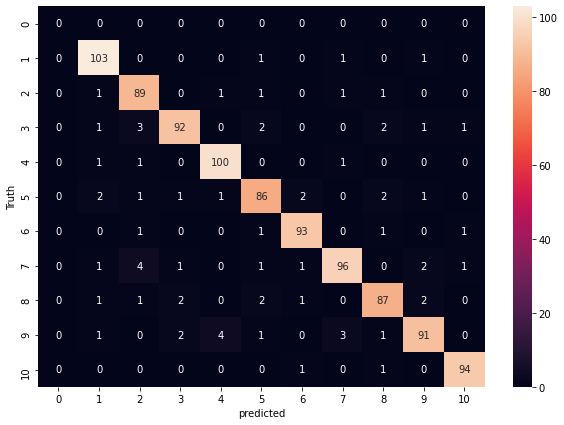

In [62]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')